In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Notes
If you feel this notebook is too long, you can head to the bottom of this notebook and look into the Summary section.

I'm using Jetbrains' DataSpell for the jupyter notebook. What you see might be different from mine.
For example, using `df` from DataSpell exposes all column's statistics which you might not see:


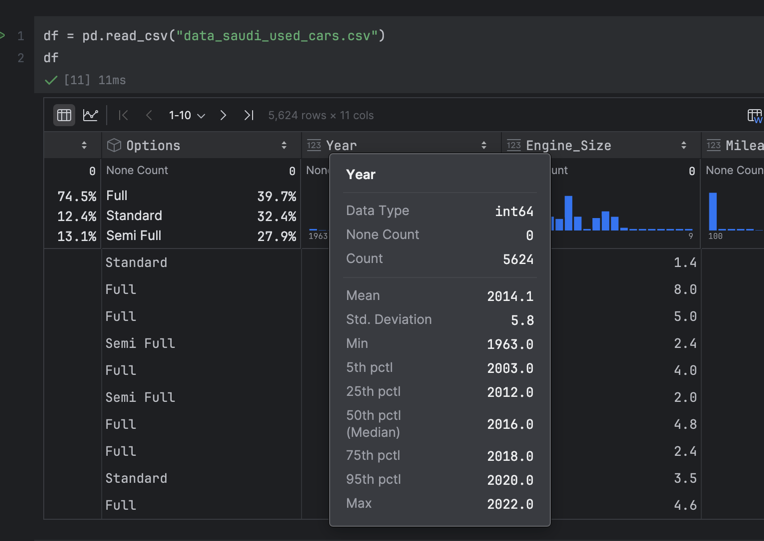

## Do we need zero price data?

In [3]:
df = pd.read_csv("data_saudi_used_cars.csv")
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [4]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


In [5]:
df.loc[df["Negotiable"] == 1]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


In [6]:
df.loc[df["Negotiable"] == 1].describe()

,Year,Engine_Size,Mileage,Price
count,1796.000000,1796.000000,1.796000e+03,1796.0
mean,2012.502227,3.541425,1.685745e+05,0.0
std,6.757189,1.602007,3.920342e+05,0.0
min,1965.000000,1.000000,1.000000e+02,0.0
25%,2010.000000,2.400000,1.575000e+04,0.0
50%,2014.000000,3.500000,1.000000e+05,0.0
75%,2017.000000,4.600000,2.212500e+05,0.0
max,2022.000000,9.000000,9.999999e+06,0.0


In [7]:
df.loc[df["Negotiable"] == 0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


In [8]:
df.loc[df["Negotiable"] == 0].describe()

,Year,Engine_Size,Mileage,Price
count,3828.000000,3828.000000,3.828000e+03,3828.000000
mean,2014.852403,3.180016,1.426419e+05,77975.053030
std,5.109197,1.458554,3.782114e+05,72728.132801
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2013.000000,2.000000,4.800000e+04,35000.000000
50%,2016.000000,2.700000,1.030000e+05,58000.000000
75%,2018.000000,4.000000,1.830000e+05,94000.000000
max,2021.000000,9.000000,2.000000e+07,850000.000000


Cars with negotiable prices lean towards older cars, but not by much. Still, I can't find any useful use case with negotiable
cars.

## Preparing Data

In [9]:
df_non_negotiable = df.loc[df["Negotiable"] == 0].drop(["Negotiable"], axis=1)

In [10]:
df_non_negotiable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3828 entries, 1 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3828 non-null   object 
 1   Region       3828 non-null   object 
 2   Make         3828 non-null   object 
 3   Gear_Type    3828 non-null   object 
 4   Origin       3828 non-null   object 
 5   Options      3828 non-null   object 
 6   Year         3828 non-null   int64  
 7   Engine_Size  3828 non-null   float64
 8   Mileage      3828 non-null   int64  
 9   Price        3828 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 329.0+ KB


No null values detected

In [11]:
df_non_negotiable.duplicated().sum()

3

Even though we have duplicate data, we won't remove them. First, because it's so little. Second, it will
accentuate for that particular features, the price is usually in that number.

In [12]:
df_non_negotiable

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


Now we're going to check the price if it makes sense. Super high price makes sense since we see many sport cars. But low price (<10) exists. 10 riyals is
40000 rupiahs. No cars are that cheap.

In [13]:
df_non_negotiable["Price"].describe()

count      3828.000000
mean      77975.053030
std       72728.132801
min           0.000000
25%       35000.000000
50%       58000.000000
75%       94000.000000
max      850000.000000
Name: Price, dtype: float64

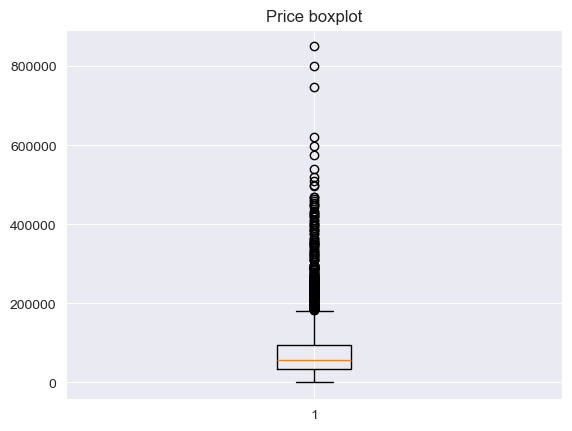

In [14]:
plt.boxplot(df_non_negotiable["Price"])
plt.title("Price boxplot")
plt.show()

In [15]:
df_non_negotiable.nsmallest(10, "Price")

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3168,Furniture,Riyadh,Toyota,Automatic,Other,Semi Full,2012,2.7,225000,0
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950
3760,5,Al-Ahsa,MG,Automatic,Saudi,Standard,2020,1.5,41000,988
3616,Elantra,Jeddah,Hyundai,Automatic,Saudi,Standard,2019,2.0,89000,993
1534,Yukon,Jeddah,GMC,Automatic,Saudi,Standard,2021,5.3,4000,1000
3892,Corolla,Hail,Toyota,Automatic,Saudi,Standard,2020,1.6,48563,1002


In [16]:
df_non_negotiable["Price"].quantile([0.01,0.013,0.015,0.017,0.018,0.02,0.03])

0.010     1626.350
0.013     2108.803
0.015     2494.550
0.017     4000.000
0.018     4943.000
0.020     6270.000
0.030    10000.000
Name: Price, dtype: float64

Ok, I think 4000 riyals makes sense. We'll filter records less than 4000 riyals. And it only takes 1.7% of our dataset, we can lose that much.

In [17]:
df_price = df_non_negotiable.loc[df["Price"] >= 4000]
df_price.describe()

,Year,Engine_Size,Mileage,Price
count,3764.000000,3764.000000,3.764000e+03,3764.000000
mean,2014.786929,3.187726,1.439476e+05,79273.996546
std,5.114088,1.461532,3.811833e+05,72652.522091
min,1963.000000,1.000000,1.000000e+02,4000.000000
25%,2013.000000,2.000000,4.900000e+04,36000.000000
50%,2016.000000,2.700000,1.042445e+05,58000.000000
75%,2018.000000,4.000000,1.840000e+05,95000.000000
max,2021.000000,9.000000,2.000000e+07,850000.000000


Dropping region and origin here. Where we bought cars doesn't really matter on the price, especially if we're talking prices on the same country.

In [18]:
df_without_location = df_price.drop(["Region","Origin"], axis=1)
df_without_location

,Type,Make,Gear_Type,Options,Year,Engine_Size,Mileage,Price
1,Yukon,GMC,Automatic,Full,2014,8.0,80000,120000
2,Range Rover,Land Rover,Automatic,Full,2015,5.0,140000,260000
3,Optima,Kia,Automatic,Semi Full,2015,2.4,220000,42000
5,CX3,Mazda,Automatic,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Porsche,Automatic,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...
5616,CX9,Mazda,Automatic,Full,2020,2.0,9500,132000
5618,Suburban,GMC,Automatic,Full,2006,5.3,86000,50000
5619,X-Trail,Nissan,Automatic,Standard,2018,2.5,78794,68000
5621,Yukon,GMC,Automatic,Full,2016,5.3,48000,145000


Separating car's maker and type doesn't make sense. There's no way Hyundai has Land Cruiser. We'll join them as one feature.

In [19]:
df_without_location["MakerType"] = df_without_location["Make"] + "-" + df_without_location["Type"]
df_car_maker = df_without_location.drop(["Make", "Type"], axis=1).loc[:,  ["MakerType", "Gear_Type", "Options", "Engine_Size", "Year", "Mileage", "Price"]]
df_car_maker

,MakerType,Gear_Type,Options,Engine_Size,Year,Mileage,Price
1,GMC-Yukon,Automatic,Full,8.0,2014,80000,120000
2,Land Rover-Range Rover,Automatic,Full,5.0,2015,140000,260000
3,Kia-Optima,Automatic,Semi Full,2.4,2015,220000,42000
5,Mazda-CX3,Automatic,Semi Full,2.0,2019,25000,58000
6,Porsche-Cayenne S,Automatic,Full,4.8,2012,189000,85000
...,...,...,...,...,...,...,...
5616,Mazda-CX9,Automatic,Full,2.0,2020,9500,132000
5618,GMC-Suburban,Automatic,Full,5.3,2006,86000,50000
5619,Nissan-X-Trail,Automatic,Standard,2.5,2018,78794,68000
5621,GMC-Yukon,Automatic,Full,5.3,2016,48000,145000


Let's check if we have some typos in the Maker and type

In [20]:
sorted(df_car_maker["MakerType"].unique())

['Aston Martin-DB9',
 'Aston Martin-Vanquish',
 'Audi-A3',
 'Audi-A4',
 'Audi-A5',
 'Audi-A6',
 'Audi-A7',
 'Audi-A8',
 'Audi-Q5',
 'Audi-Q7',
 'Audi-S5',
 'Audi-S8',
 'BMW-The 3',
 'BMW-The 4',
 'BMW-The 5',
 'BMW-The 6',
 'BMW-The 7',
 'BMW-The M',
 'BMW-X',
 'BMW-Z',
 'BYD-F3',
 'Bentley-Bentayga',
 'Bentley-Flying Spur',
 'Cadillac-ATS',
 'Cadillac-CT-S',
 'Cadillac-CT4',
 'Cadillac-CT5',
 'Cadillac-CT6',
 'Cadillac-Escalade',
 'Cadillac-Fleetwood',
 'Cadillac-XT5',
 'Changan-CS35',
 'Changan-CS35 Plus',
 'Changan-CS75',
 'Changan-CS85',
 'Changan-CS95',
 'Changan-Eado',
 'Changan-Seven',
 'Chery-Tiggo',
 'Chevrolet-Abeka',
 'Chevrolet-Aveo',
 'Chevrolet-Blazer',
 'Chevrolet-Camaro',
 'Chevrolet-Caprice',
 'Chevrolet-Colorado',
 'Chevrolet-Cruze',
 'Chevrolet-Impala',
 'Chevrolet-Kaptiva',
 'Chevrolet-Lumina',
 'Chevrolet-Malibu',
 'Chevrolet-Optra',
 'Chevrolet-Silverado',
 'Chevrolet-Spark',
 'Chevrolet-Suburban',
 'Chevrolet-Tahoe',
 'Chevrolet-Trailblazer',
 'Chevrolet-Traverse

In [21]:
["Mitsubishi-Other", "Other-Other", "Porsche-Other"]

['Mitsubishi-Other', 'Other-Other', 'Porsche-Other']

Ok, turns out we have car's type "Other" which isn't really helpful. We'll remove them as well.

In [22]:
df_without_location["MakerType"] = df_without_location["Make"] + "-" + df_without_location["Type"]
df_car_maker = df_without_location.loc[df_without_location["Type"] != "Other"].drop(["Make", "Type"], axis=1).loc[:,  ["MakerType", "Gear_Type", "Options", "Engine_Size", "Year", "Mileage", "Price"]]
df_car_maker

,MakerType,Gear_Type,Options,Engine_Size,Year,Mileage,Price
1,GMC-Yukon,Automatic,Full,8.0,2014,80000,120000
2,Land Rover-Range Rover,Automatic,Full,5.0,2015,140000,260000
3,Kia-Optima,Automatic,Semi Full,2.4,2015,220000,42000
5,Mazda-CX3,Automatic,Semi Full,2.0,2019,25000,58000
6,Porsche-Cayenne S,Automatic,Full,4.8,2012,189000,85000
...,...,...,...,...,...,...,...
5616,Mazda-CX9,Automatic,Full,2.0,2020,9500,132000
5618,GMC-Suburban,Automatic,Full,5.3,2006,86000,50000
5619,Nissan-X-Trail,Automatic,Standard,2.5,2018,78794,68000
5621,GMC-Yukon,Automatic,Full,5.3,2016,48000,145000


Not sure if this will make the ML algorithm better, but we'll convert Year to Age instead.

In [23]:
df_car_maker["Age"] = 2021 - df_car_maker["Year"]
df_car_maker = df_car_maker.loc[:, ["MakerType", "Gear_Type", "Options", "Engine_Size", "Age", "Mileage", "Price"]]
df_car_maker

,MakerType,Gear_Type,Options,Engine_Size,Age,Mileage,Price
1,GMC-Yukon,Automatic,Full,8.0,7,80000,120000
2,Land Rover-Range Rover,Automatic,Full,5.0,6,140000,260000
3,Kia-Optima,Automatic,Semi Full,2.4,6,220000,42000
5,Mazda-CX3,Automatic,Semi Full,2.0,2,25000,58000
6,Porsche-Cayenne S,Automatic,Full,4.8,9,189000,85000
...,...,...,...,...,...,...,...
5616,Mazda-CX9,Automatic,Full,2.0,1,9500,132000
5618,GMC-Suburban,Automatic,Full,5.3,15,86000,50000
5619,Nissan-X-Trail,Automatic,Standard,2.5,3,78794,68000
5621,GMC-Yukon,Automatic,Full,5.3,5,48000,145000


Alright, now we have 3752 rows The regression example will be referenced here since we have similar case. Plus some models recommended by chatgpt.

## Modeling

In [28]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import lightgbm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [29]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Options']),
    ('Binary', ce.BinaryEncoder(), ['MakerType'])
], remainder='passthrough')

In [30]:
# Memisahkan data independen variabel dengan target
X = df_car_maker.drop(['Price'], axis=1)
y = df_car_maker['Price']

In [31]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1)

In [32]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
mlp = MLPRegressor(random_state=1)
lgb = lightgbm.LGBMRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_mlp = TransformedTargetRegressor(mlp, func=np.log, inverse_func=np.exp)
log_lgb = TransformedTargetRegressor(lgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_mlp, log_lgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-51370.65115234 -62220.24978768 -48079.16588165 -56871.69914854
 -53359.54628554] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-27751.89259028 -31157.57505709 -27685.02022412 -29583.67793286
 -27514.62982362] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.37716458 -0.40315317 -0.38766846 -0.40204889 -0.35225059] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-40679.10359092 -49885.50941298 -32711.73649073 -41586.90246452
 -44492.736715  ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-21151.11201406 -21771.51360989 -18418.62363676 -20903.57156048
 -22516.20759079] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [33]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'Multi-layer Perceptron Regressor', 'Light Gradient-Boosting Machine Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-5.438026e+04,4.847187e+03,-2.873856e+04,1.424593e+03,-3.844571e-01,1.876042e-02
1,KNN Regressor,-4.187120e+04,5.594628e+03,-2.095221e+04,1.384076e+03,-3.385824e-01,3.266264e-02
2,DecisionTree Regressor,-5.284236e+04,3.879208e+03,-2.542702e+04,6.328864e+02,-3.773749e-01,2.683849e-02
3,RandomForest Regressor,-3.945617e+04,5.191443e+03,-1.909944e+04,1.426346e+03,-2.571134e-01,1.830346e-02
4,XGBoost Regressor,-3.748174e+04,3.651367e+03,-1.858587e+04,1.088687e+03,-2.469983e-01,1.170998e-02
5,Multi-layer Perceptron Regressor,-1.794028e+14,3.588056e+14,-7.324089e+12,1.464818e+13,-8.137877e+08,1.627575e+09
6,Light Gradient-Boosting Machine Regressor,-3.761096e+04,5.367912e+03,-1.860399e+04,1.229823e+03,-2.416486e-01,1.251869e-02


MLP did reaaaaly bad. Top 3 models by RMSE and MAE are LGB, XGBoost, and RandomForest. MAPE also tells the same story and we achieved 24-25% error difference on training sets. However, the standard deviation is way better in XGBoost. This means that XGBoost is more consistent. Let's tune those three models.

In [34]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'LGB': lightgbm.LGBMRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 3001, number of used features: 15
[LightGBM] [Info] Start training from score 80198.306231


,RMSE,MAE,MAPE
XGB,37899.324321,19659.501953,0.322928
LGB,34450.729060,18714.426569,0.294168
RandomForest,36955.302146,19635.793775,0.331713


LGB wins, let's focus tuning its hyperparameters. The parameters documentation can be found here: [LGBMRegressor Parameters](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html). Since LGBM is also a gradient boosting algorithm like XGBoost, many parameters are taken from capstone example.

In [40]:
boosting_type = ["gbdt", "dart", "rf"]
# default is 31
num_leaves = list(np.arange(31, 100))
max_depth = list(np.arange(1, 11))
learning_rate = list(np.arange(1, 100)/100)
n_estimators = list(np.arange(100, 201))
subsample_for_bin = [100, 250, 500, 1000, 10000, 50000, 100000, 200000, 500000, 1000000]
subsample = list(np.arange(2, 10)/10)
reg_alpha = list(np.logspace(-3, 1, 10))

hyperparam_space_lgb = {
    'model__boosting_type': boosting_type,
    'model__num_leaves': num_leaves,
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample_for_bin': subsample_for_bin,
    'model__subsample': subsample,
    'model__reg_alpha': reg_alpha,
}

In [41]:
# Benchmark model dengan hyperparameter tuning
lgb = lightgbm.LGBMRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_lgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', lgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_lgb = RandomizedSearchCV(
    estimator_lgb,
    param_distributions = hyperparam_space_lgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1
)

In [42]:
# Fitting data training untuk mencari parameter terbaik
random_lgb.fit(X_train, y_train)

[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Using too 

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src/boosting/rf.hpp, line 37 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_7ctj68t1uo/croot/lightgbm_1741973070078/work/src

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,estimator,Pipeline(step...erbosity=0))])
,param_distributions,"{'model__boosting_type': ['gbdt', 'dart', ...], 'model__learning_rate': [0.01, 0.02, ...], 'model__max_depth': [1, 2, ...], 'model__n_estimators': [100, 101, ...], ...}"
,n_iter,50
,scoring,"['neg_root_mean_squared_error', 'neg_mean_absolute_error', ...]"
,n_jobs,-1
,refit,'neg_root_mean_squared_error'
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,1
,error_score,nan


In [43]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_lgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample_for_bin,param_model__subsample,param_model__reg_alpha,param_model__num_leaves,param_model__n_estimators,param_model__max_depth,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
22,18.106771,0.687999,0.029261,0.048899,100,0.2,0.007743,54,176,7,...,653.068564,1,-0.320545,-0.295513,-0.287619,-0.304713,-0.322224,-0.306123,0.013596,5
0,21.818106,1.268943,0.005940,0.000859,50000,0.9,0.007743,80,157,9,...,909.658574,5,-0.308074,-0.309618,-0.290305,-0.305445,-0.330733,-0.308835,0.012927,6
6,14.102387,0.606715,0.004708,0.000746,100000,0.9,1.291550,69,132,7,...,889.946222,4,-0.288445,-0.296965,-0.276655,-0.307577,-0.303167,-0.294562,0.011021,2
42,10.400571,0.352719,0.008304,0.006310,250,0.6,0.002783,33,126,8,...,780.093933,6,-0.310261,-0.316842,-0.290085,-0.306967,-0.339149,-0.312661,0.015918,7
27,20.732645,0.704409,0.004293,0.000537,10000,0.4,0.002783,59,193,7,...,1026.214794,3,-0.289716,-0.311643,-0.282046,-0.298967,-0.302722,-0.297019,0.010273,3


In [44]:
# Cek skor dan params terbaik
print('LGBoost')
print('Best_score:', random_lgb.best_score_)
print('Best_params:', random_lgb.best_params_)

LGBoost
Best_score: -37736.67676015994
Best_params: {'model__subsample_for_bin': 100, 'model__subsample': 0.2, 'model__reg_alpha': 0.007742636826811269, 'model__num_leaves': 54, 'model__n_estimators': 176, 'model__max_depth': 7, 'model__learning_rate': 0.45, 'model__boosting_type': 'dart'}


In [45]:
# Model XGBoost
model = {'LGB': lightgbm.LGBMRegressor(random_state=1)}

# Define model terhadap estimator terbaik
lgb_tuning = random_lgb.best_estimator_

# Fitting model
lgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_lgb_tuning = lgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_lgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_lgb_tuning))
mae_lgb_tuning = mean_absolute_error(y_test, y_pred_lgb_tuning)
mape_lgb_tuning = mean_absolute_percentage_error(y_test, y_pred_lgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_lgb_tuning, 'MAE': mae_lgb_tuning, 'MAPE': mape_lgb_tuning}, index=model.keys())
score_after_tuning

[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

,RMSE,MAE,MAPE
LGB,34632.408954,18088.265796,0.283312


In [46]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['LGB']).T

,RMSE,MAE,MAPE
LGB,34450.72906,18714.426569,0.294168


In [47]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
LGB,34632.408954,18088.265796,0.283312


Well that's unexpected. MAE and MAPE are slightly better, but RMSE is slightly worse. That means, on average, the error is better, but the extreme error value is slightly worse.

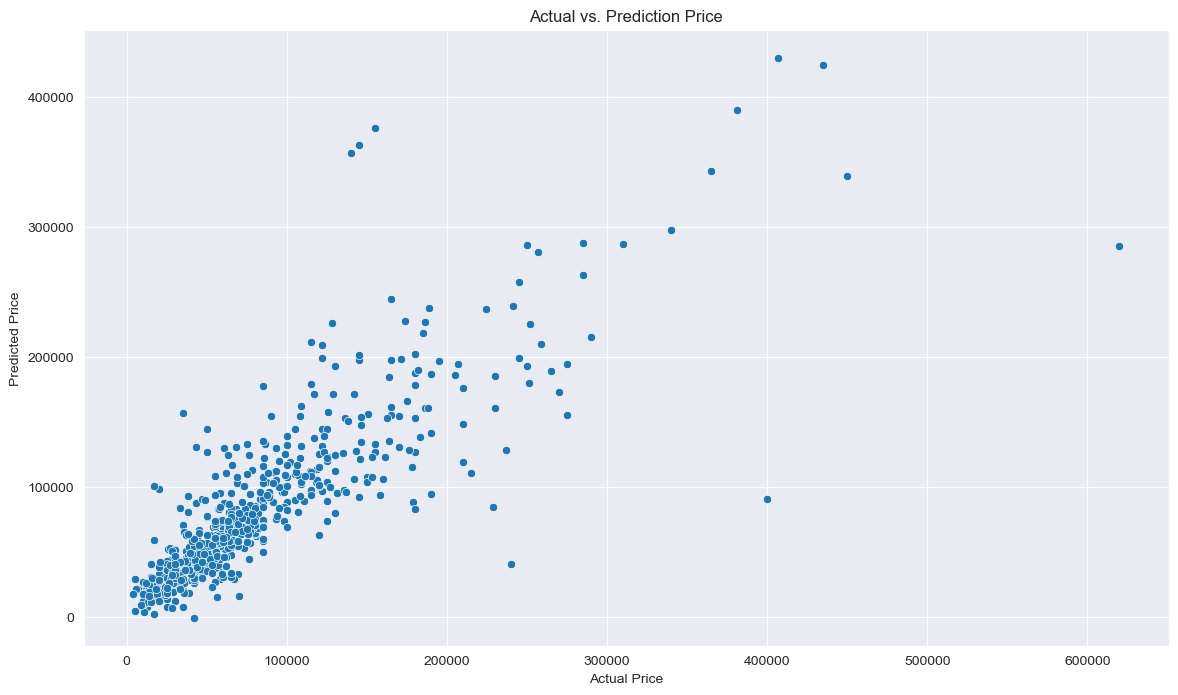

In [48]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_lgb_tuning).set(title='Actual vs. Prediction Price',
                                               xlabel='Actual Price',
                                               ylabel='Predicted Price');

The model seems to be good at predicting price where we have a lot of data. And getting worse where the price is higher and the data is sparse.

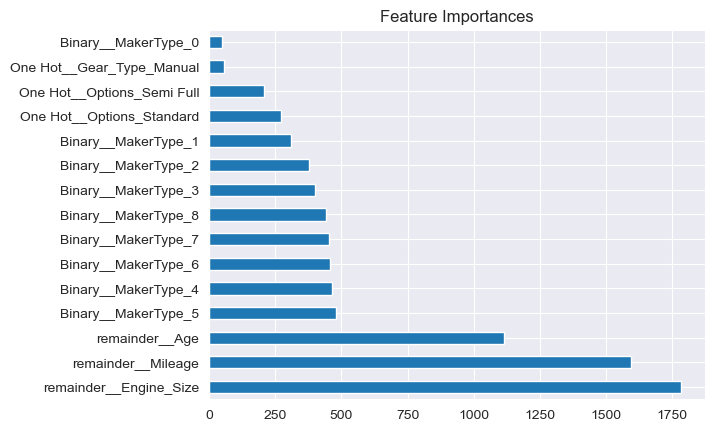

In [53]:
# Plot feature importances
feature_imp = pd.Series(lgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances');

## Conclusion & Recommendation

If we combine MakerType values, it's estimated to be the most important feature to determine the used car price, which is what we expected before (you can read the data analysis at README.md file). Followed by engine size, mileage, and age.

We got 28% of MAPE value, which is somewhat similar to what the capstone example have. However, we don't really have a massive bias that the example have. The scatter plot looks pretty uniform.

However, to get the best results, it will be much better if we have the price on the used car when it's newly bought. This way, we hope that the model will calculate the depreciation value instead of "guessing" the used price. This will also benefit on never seen brand and type. Since the depreciation value is pretty uniform (unless it's a luxury or chinese brand), we can still do best effort to calculate the depreciation value. If we don't have this, when the model is faced with unknown brand, it will be a pretty much random guess.

Horsepower is also the data that is more relevant than engine size. Since we can have a 3000 cc engine with twin turbo more expensive than a 5000 cc naturally aspirated engine.

In [57]:
# import pickle

# pickle.dump(lgb_tuning, open('lgb_tuning_model.pkl', 'wb'))

# Summary
This section meant to answer every point needed for scoring referred in the capstone guidelines.

## Preface
Since this is actually a test and not a real usecase, you might feel that the derived issue is made up/fake. A good analysis comes from a user issues and pain-point, then look for supporting datas. But we start from the data and fabricate the issues and pain-point. But I'll try my best.

## Business Problem & Data Understanding
The world of used car market is huge. And in some countries, the sales are actually larger than new cars. Some quick ChatGPT prompt reveals that US has 70% used cars sales compared to new cars. And UK has even higher number at 80%.

Used car seller always buy from someone else at a certain price. And determining this price is one of the most crucial part of the business since it will decide your margin and could differentiate you from your competitors with competing price. In an effort to ease this process, we can create an ML algorithm to help the seller know an estimation of the market selling price of a certain used car, then calculate using company's target margin and operation cost to get the buying price.

We have Saudi Arabia used car data from syarah.com (car marketplace like olx) at our disposal, and we'll explore on what we can do to create the algorithm.

### Data Description
The data has 11 columns and can be divided into 4 categories.

The first one is the origin of the car. This includes `Region` and  `Origin` columns which tells us where the car comes from. We have 2 `Origin` distinct values and 27 `Region` values.

The second one is the specification of the car. This includes:
- Make -> the car brand (toyota, honda, etc)
- Type -> the car type (land cruiser, civic, etc)
- Gear_Type -> the transmission of the car (automatic or manual)
- Options -> whether the car has the basic/minimum trim (standard), or the highest trim (full), or in the middle (semi full)
- Engine_Size -> unit in liter. Defines the engine displacement volume, highly correlated on the car's output power. This also tells us that we don't have any electric car data.

The third one is the usage:
- Year -> it's either the year the car bought, or the year the car is manufactured. Probably the latter. The older the car is the higher maintenance it will need.
- Mileage -> how far the car has travelled since its first use, usually measured in kilometers. The more the mileage, the more it's likely to break and need a fix.

The final one is the price itself:
- Price -> the price of the car listed on the platform.
- Negotiable -> whether the price is negotiable or not. When it's negotiable, the price is 0. The sellers don't list the offering price, and the buyer will instead offer the buying price. I'm not really familiar with this and as far as I know, Indonesia's e-commerce platfrom don't put 0 price when it's negotiable. Maybe it's a cultural thing.

## Data Cleaning, Feature Selection & Feature Engineering
sdasda

## Analytics (Algorithm & Evaluation Metrics)
In this section, we'll talk about the final, tuned, LGBoost model. The thinking process and model selection is described at the previous section.